## 1. Data Loading & Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
df = pd.read_csv('../data/merged_data.csv')
df.head()

,customer_id_new,engagement_score,purchase_interest_score,customer_id_legacy,transaction_id,purchase_amount,purchase_date,customer_rating,product_category_Books,product_category_Clothing,...,review_sentiment_Negative,review_sentiment_Neutral,review_sentiment_Positive,review_sentiment_Unknown,social_media_platform_Facebook,social_media_platform_Instagram,social_media_platform_LinkedIn,social_media_platform_TikTok,social_media_platform_Twitter,social_media_platform_Unknown
0,100,73.0,4.4,100,1113.0,172.0,2024-04-22,4.0,False,True,...,True,False,False,False,False,False,False,False,True,False
1,100,73.0,4.4,100,1147.0,387.0,2024-05-26,4.6,True,False,...,True,False,False,False,False,False,False,False,True,False
2,100,81.0,4.4,100,1113.0,172.0,2024-04-22,4.0,False,True,...,False,True,False,False,False,True,False,False,False,False
3,100,81.0,4.4,100,1147.0,387.0,2024-05-26,4.6,True,False,...,False,True,False,False,False,True,False,False,False,False
4,101,68.0,1.0,101,1017.0,271.0,2024-01-17,2.1,True,False,...,False,True,False,False,False,False,False,False,True,False


### Quick Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id_new                  295 non-null    object 
 1   engagement_score                 295 non-null    float64
 2   purchase_interest_score          295 non-null    float64
 3   customer_id_legacy               295 non-null    object 
 4   transaction_id                   295 non-null    float64
 5   purchase_amount                  295 non-null    float64
 6   purchase_date                    252 non-null    object 
 7   customer_rating                  295 non-null    float64
 8   product_category_Books           295 non-null    bool   
 9   product_category_Clothing        295 non-null    bool   
 10  product_category_Electronics     295 non-null    bool   
 11  product_category_Groceries       295 non-null    bool   
 12  product_category_Sport

In [3]:
# Check for missing values
df.isnull().sum()

customer_id_new                     0
engagement_score                    0
purchase_interest_score             0
customer_id_legacy                  0
transaction_id                      0
purchase_amount                     0
purchase_date                      43
customer_rating                     0
product_category_Books              0
product_category_Clothing           0
product_category_Electronics        0
product_category_Groceries          0
product_category_Sports             0
product_category_Unknown            0
review_sentiment_Negative           0
review_sentiment_Neutral            0
review_sentiment_Positive           0
review_sentiment_Unknown            0
social_media_platform_Facebook      0
social_media_platform_Instagram     0
social_media_platform_LinkedIn      0
social_media_platform_TikTok        0
social_media_platform_Twitter       0
social_media_platform_Unknown       0
dtype: int64

In [4]:
# Identify product category columns
product_category_cols = [col for col in df.columns if col.startswith('product_category_')]
print('Product category columns:', product_category_cols)

# Convert one-hot to single label
def get_category(row):
    for col in product_category_cols:
        if row[col]:
            return col.replace('product_category_', '')
    return 'Unknown'

df['product_category'] = df.apply(get_category, axis=1)
df['product_category'].value_counts()

Product category columns: ['product_category_Books', 'product_category_Clothing', 'product_category_Electronics', 'product_category_Groceries', 'product_category_Sports', 'product_category_Unknown']


product_category
Sports         67
Electronics    53
Groceries      47
Books          46
Unknown        43
Clothing       39
Name: count, dtype: int64

In [5]:
# Identify relevant columns
sentiment_cols = [col for col in df.columns if col.startswith('review_sentiment_')]
platform_cols = [col for col in df.columns if col.startswith('social_media_platform_')]

feature_cols = [
    'engagement_score', 'purchase_interest_score', 'customer_rating', 'purchase_amount'
] + sentiment_cols + platform_cols

X = df[feature_cols]
y = df['product_category']

X.head()

,engagement_score,purchase_interest_score,customer_rating,purchase_amount,review_sentiment_Negative,review_sentiment_Neutral,review_sentiment_Positive,review_sentiment_Unknown,social_media_platform_Facebook,social_media_platform_Instagram,social_media_platform_LinkedIn,social_media_platform_TikTok,social_media_platform_Twitter,social_media_platform_Unknown
0,73.0,4.4,4.0,172.0,True,False,False,False,False,False,False,False,True,False
1,73.0,4.4,4.6,387.0,True,False,False,False,False,False,False,False,True,False
2,81.0,4.4,4.0,172.0,False,True,False,False,False,True,False,False,False,False
3,81.0,4.4,4.6,387.0,False,True,False,False,False,True,False,False,False,False
4,68.0,1.0,2.1,271.0,False,True,False,False,False,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (236, 14)
Test shape: (59, 14)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [8]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Books       0.31      0.44      0.36         9
    Clothing       0.38      0.38      0.38         8
 Electronics       0.17      0.09      0.12        11
   Groceries       0.17      0.11      0.13         9
      Sports       0.50      0.54      0.52        13
     Unknown       0.75      1.00      0.86         9

    accuracy                           0.42        59
   macro avg       0.38      0.43      0.39        59
weighted avg       0.38      0.42      0.39        59



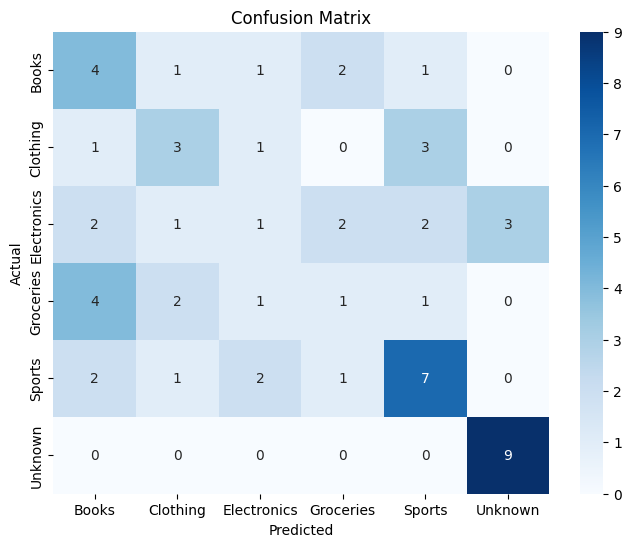

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

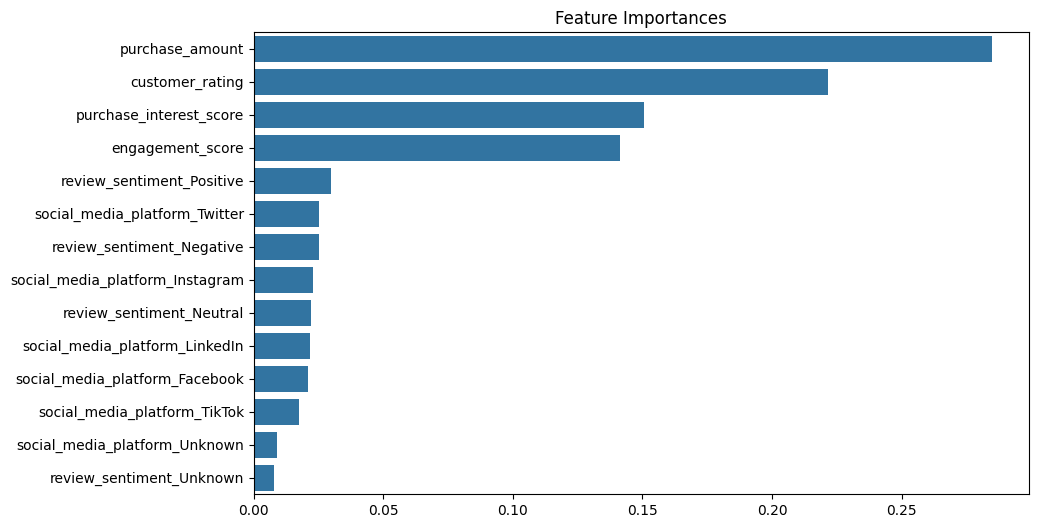

In [10]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [feature_cols[i] for i in indices]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features_sorted)
plt.title('Feature Importances')
plt.show()

In [11]:
sample_results = X_test.copy()
sample_results['Actual'] = y_test
sample_results['Predicted'] = y_pred
sample_results[['Actual', 'Predicted']].head(10)

,Actual,Predicted
283,Unknown,Unknown
80,Groceries,Clothing
68,Sports,Electronics
84,Unknown,Unknown
138,Sports,Books
115,Electronics,Unknown
125,Sports,Sports
211,Electronics,Sports
105,Electronics,Groceries
140,Sports,Sports


In [12]:
import joblib

joblib.dump(clf, '../models/product_recommendation_model.pkl')

print("Product recommendation model and features saved.")

Product recommendation model and features saved.


## Conclusion

This notebook demonstrated how to build a product category prediction engine using customer, transaction, sentiment, and social media features. You can further improve the model by tuning hyperparameters, engineering new features, or trying advanced algorithms.

Feel free to adapt this workflow to your specific needs!